In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import math
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline

In [2]:
queens=pd.read_csv('queens_clean.csv', low_memory=False)
brooklyn=pd.read_csv('brooklyn_clean.csv', low_memory=False)

In [3]:
queens['building_class_category']=queens['building_class_category'].str.replace('                        ','')
brooklyn['building_class_category']=brooklyn['building_class_category'].str.replace('                    ','')
brooklyn['building_class_category']=brooklyn['building_class_category'].str.replace('\d+','')
queens['building_class_category']=queens['building_class_category'].str.replace('\d+','')
queens['building_class_category']=queens['building_class_category'].str.replace('  ','')
queens['building_class_category']=queens['building_class_category'].str.replace('  ','')
brooklyn['building_class_category']=brooklyn['building_class_category'].str.replace('DWELLINGS','HOMES')
brooklyn['building_class_category']=brooklyn['building_class_category'].str.replace('  ','')
queens['building_class_category']=queens['building_class_category'].str.replace('DWELLINGS','HOMES')
brooklyn['neighborhood']=brooklyn['neighborhood'].str.replace(' ', '_')
brooklyn['neighborhood']=brooklyn['neighborhood'].str.replace('____','')
brooklyn['neighborhood']=brooklyn['neighborhood'].str.replace('__','')
queens['neighborhood']=queens['neighborhood'].str.replace(' ', '_')

In [4]:
queens['building_class_category']=queens['building_class_category'].str.replace(' ','_')
brooklyn['building_class_category']=brooklyn['building_class_category'].str.replace(' ','_')
queens.building_class_category.value_counts()

ONE_FAMILY_HOMES                          23703
TWO_FAMILY_HOMES                          15925
COOPS_-_ELEVATOR_APARTMENTS_               8463
THREE_FAMILY_HOMES                         3490
CONDOS_-_ELEVATOR_APARTMENTS               2862
COOPS_-_WALKUP_APARTMENTS_                 2604
RENTALS_-_WALKUP_APARTMENTS_               1580
TAX_CLASSVACANT_LAND_                      1238
TAX_CLASSCONDOS                             924
STORE_BUILDINGS_                            787
CONDOS_-_WALKUP_APARTMENTS                  747
CONDO_PARKING_                              646
COMMERCIAL_GARAGES                          501
RENTALS_-_-_UNIT_                           382
COMMERCIAL_CONDOS_                          299
TAX_CLASS-_OTHER_                           280
WAREHOUSES                                  250
FACTORIES_                                  249
CONDO_COOPS_                                230
COMMERCIAL_VACANT_LAND                      223
OFFICE_BUILDINGS                        

In [5]:
queens[['neighborhood', 'building_class_category']].apply(lambda x: x.astype('category'))

,neighborhood,building_class_category
0,AIRPORT_LA_GUARDIA,ONE_FAMILY_HOMES
1,AIRPORT_LA_GUARDIA,ONE_FAMILY_HOMES
2,AIRPORT_LA_GUARDIA,ONE_FAMILY_HOMES
3,AIRPORT_LA_GUARDIA,ONE_FAMILY_HOMES
4,AIRPORT_LA_GUARDIA,ONE_FAMILY_HOMES
5,AIRPORT_LA_GUARDIA,ONE_FAMILY_HOMES
6,AIRPORT_LA_GUARDIA,ONE_FAMILY_HOMES
7,AIRPORT_LA_GUARDIA,TWO_FAMILY_HOMES
8,AIRPORT_LA_GUARDIA,THREE_FAMILY_HOMES
9,AIRPORT_LA_GUARDIA,THREE_FAMILY_HOMES


In [6]:
brooklyn[['neighborhood', 'building_class_category']].apply(lambda x: x.astype('category'))

,neighborhood,building_class_category
0,BATH_BEACH,ONE_FAMILY_HOMES
1,BATH_BEACH,ONE_FAMILY_HOMES
2,BATH_BEACH,ONE_FAMILY_HOMES
3,BATH_BEACH,ONE_FAMILY_HOMES
4,BATH_BEACH,ONE_FAMILY_HOMES
5,BATH_BEACH,ONE_FAMILY_HOMES
6,BATH_BEACH,ONE_FAMILY_HOMES
7,BATH_BEACH,ONE_FAMILY_HOMES
8,BATH_BEACH,ONE_FAMILY_HOMES
9,BATH_BEACH,ONE_FAMILY_HOMES


In [7]:
queens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66391 entries, 0 to 66390
Data columns (total 27 columns):
Unnamed: 0                        66391 non-null int64
address                           66391 non-null object
apartment_number                  66391 non-null object
block                             66391 non-null int64
borough                           66391 non-null int64
building_class_at_present         66391 non-null object
building_class_at_time_of_sale    66391 non-null object
building_class_category           66391 non-null object
commercial_units                  66391 non-null object
commerical_units                  66391 non-null object
ease-ment                         66391 non-null object
gross_square_feet                 66391 non-null int64
gross_square_feet_c               47262 non-null float64
land_square_feet                  66391 non-null object
lot                               66391 non-null int64
month                             66391 non-null int64


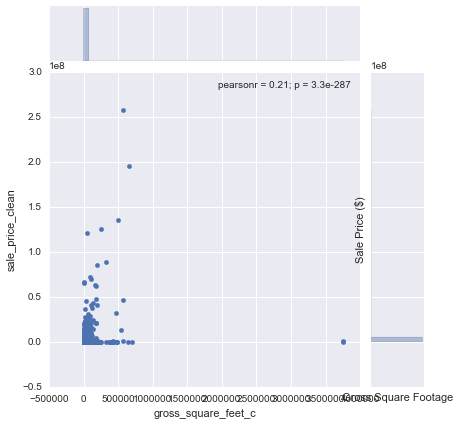

In [8]:
sns.jointplot('gross_square_feet_c', 'sale_price_clean', kind='scatter', data=queens)
plt.xlabel('Gross Square Footage')
plt.ylabel('Sale Price ($)')
plt.show()

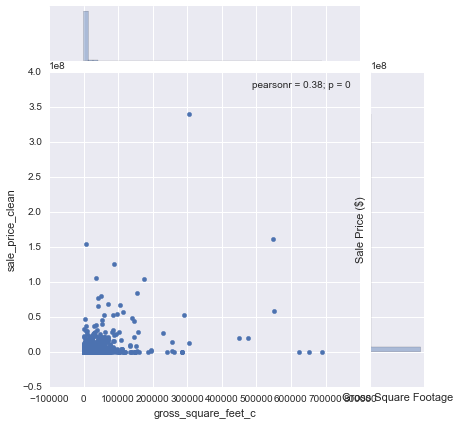

In [9]:
sns.jointplot('gross_square_feet_c', 'sale_price_clean', kind='scatter', data=brooklyn)
plt.xlabel('Gross Square Footage')
plt.ylabel('Sale Price ($)')
plt.show()

The relationship between square feet and price in Queens is very loose (Pearson Correlation Coefficient=0.21) but it is statisically significant with extremely small p value.


In [10]:
queens_sales=queens['sale_price_clean'].sort_values().dropna()

In [11]:
brooklyn_sales=brooklyn['sale_price_clean'].sort_values().dropna()

In [12]:
print(queens_sales.head())

52135   1.000000
18149   1.000000
62460   1.000000
43329   1.000000
23830   1.000000
Name: sale_price_clean, dtype: float64


In [13]:
print(queens_sales.tail())

44925   125000000.000000
59381   135500000.000000
56477   173439705.000000
56436   195000000.000000
56358   257500000.000000
Name: sale_price_clean, dtype: float64


In [14]:
brooklyn_sales=brooklyn.sale_price_clean.sort_values()

In [15]:
queens_03=queens[queens['year']==2003].dropna()

In [16]:
queens_16=queens[queens['year']==2016].dropna()

In [17]:
t_stat,p=stats.ttest_ind(queens_03['sale_price_clean'], queens_16['sale_price_clean'], equal_var=False)

In [18]:
print('Queens T-Stat:', t_stat)
print('Queens P-Value:', p)

Queens T-Stat: -13.000650331287613
Queens P-Value: 2.2541363988585703e-38


In [19]:
brooklyn_03=brooklyn[brooklyn['year']==2003].dropna()
brooklyn_16=brooklyn[brooklyn['year']==2016].dropna()

In [20]:
t_stat,p=stats.ttest_ind(brooklyn_03['sale_price_clean'], brooklyn_16['sale_price_clean'], equal_var=False)

In [21]:
print('Brooklyn T-Stat:', t_stat)
print('Brooklyn P-Value:', p)

Brooklyn T-Stat: -17.70427632742636
Brooklyn P-Value: 5.253754227842678e-69


Both Queens and Brooklyn have a distinct and significant difference in prices between 2003 and 2016, as shown by the large t-statistics and the tiny p-values.  Brooklyn does have a larger difference between the 2003 mean and the 2016 mean.  

In [22]:
queens_homes=queens[queens['building_class_category']==('ONE_FAMILY_HOMES' or 'TWO_FAMILY_HOMES' or 'THREE_FAMILY_HOMES')].dropna()

In [23]:
queens_homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15174 entries, 1 to 65929
Data columns (total 27 columns):
Unnamed: 0                        15174 non-null int64
address                           15174 non-null object
apartment_number                  15174 non-null object
block                             15174 non-null int64
borough                           15174 non-null int64
building_class_at_present         15174 non-null object
building_class_at_time_of_sale    15174 non-null object
building_class_category           15174 non-null object
commercial_units                  15174 non-null object
commerical_units                  15174 non-null object
ease-ment                         15174 non-null object
gross_square_feet                 15174 non-null int64
gross_square_feet_c               15174 non-null float64
land_square_feet                  15174 non-null object
lot                               15174 non-null int64
month                             15174 non-null int64


In [24]:
brooklyn_homes=brooklyn[brooklyn['building_class_category']==('ONE_FAMILY_HOMES' or 'TWO_FAMILY_HOMES' or 'THREE_FAMILY_HOMES')].dropna()

In [25]:
brooklyn_homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5480 entries, 1 to 59114
Data columns (total 26 columns):
Unnamed: 0                        5480 non-null int64
address                           5480 non-null object
apartment_number                  5480 non-null object
block                             5480 non-null int64
borough                           5480 non-null int64
building_class_at_present         5480 non-null object
building_class_at_time_of_sale    5480 non-null object
building_class_category           5480 non-null object
commercial_units                  5480 non-null int64
ease-ment                         5480 non-null object
gross_square_feet                 5480 non-null float64
gross_square_feet_c               5480 non-null float64
land_square_feet                  5480 non-null object
lot                               5480 non-null int64
month                             5480 non-null int64
neighborhood                      5480 non-null object
residential_unit

In [26]:
t_stat,p=stats.ttest_ind(queens_homes['sale_price_clean'], brooklyn_homes['sale_price_clean'], equal_var=False)

In [27]:
print('Brooklyn Homes Against Queens Homes T-Stat:', t_stat)
print ('P value:', p)

Brooklyn Homes Against Queens Homes T-Stat: -15.148545169054458
P value: 6.075229855590701e-51


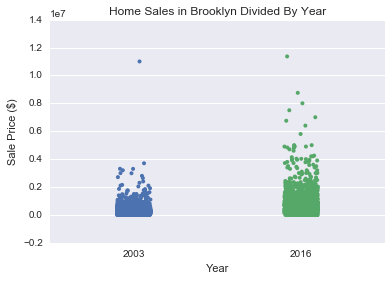

In [28]:
sns.stripplot(x='year', y='sale_price_clean', data=brooklyn_homes, size=4, jitter=True)
plt.xlabel('Year')
plt.ylabel('Sale Price ($)')
plt.title('Home Sales in Brooklyn Divided By Year')
plt.show()

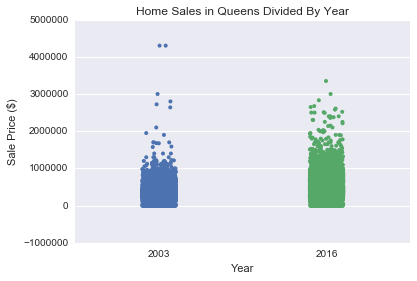

In [29]:
sns.stripplot(x='year', y='sale_price_clean', data=queens_homes, size=4, jitter=True)
plt.xlabel('Year')
plt.ylabel('Sale Price ($)')
plt.title('Home Sales in Queens Divided By Year')
plt.show()

In [30]:
print('Average Sale Price of Homes in Brooklyn', brooklyn_homes['sale_price_clean'].mean())
print('Average Sale Price of Homes in Queens', queens_homes['sale_price_clean'].mean())

Average Sale Price of Homes in Brooklyn 562956.6083941606
Average Sale Price of Homes in Queens 434793.92091735866


Interestingly, there is a very large and statistically significant difference between means in home sales in Queens and Brooklyn.  The average home in Brooklyn is worth more than $128,000 more than an average home in Queens.  

Examining the home sales by year may provide some more insight on the difference in prices between Brooklyn and Queens

In [31]:
brooklyn_homes_2003=brooklyn_homes[brooklyn_homes['year']==2003]
brooklyn_homes_2016=brooklyn_homes[brooklyn_homes['year']==2016]
queens_homes_2003=queens_homes[queens_homes['year']==2003]
queens_homes_2016=queens_homes[queens_homes['year']==2016]

In [32]:
t_stat,p=stats.ttest_ind(queens_homes_2003['sale_price_clean'], brooklyn_homes_2003['sale_price_clean'], equal_var=False)

In [33]:
print('T-Test for 2003 Homes In Queens and Brooklyn:', t_stat)
print('P-Value:', p)

T-Test for 2003 Homes In Queens and Brooklyn: -4.60132480381934
P-Value: 4.334244144336472e-06


In [34]:
t_stat,p=stats.ttest_ind(queens_homes_2016['sale_price_clean'], brooklyn_homes_2016['sale_price_clean'], equal_var=False)

In [35]:
print('T-Test for 2016 Homes In Queens and Brooklyn:', t_stat)
print('P-Value:', p)

T-Test for 2016 Homes In Queens and Brooklyn: -14.843249845655098
P-Value: 6.09061610952977e-48


In [36]:
queens_homes_sorted=queens_homes.sale_price_clean.sort_values().dropna()

In [37]:
brooklyn_homes_sorted=brooklyn_homes.sale_price_clean.sort_values()

The gap between the home prices in Brooklyn and Queens grew quite significantly between 2003 and 2016 as shwon by the above T-stats.  

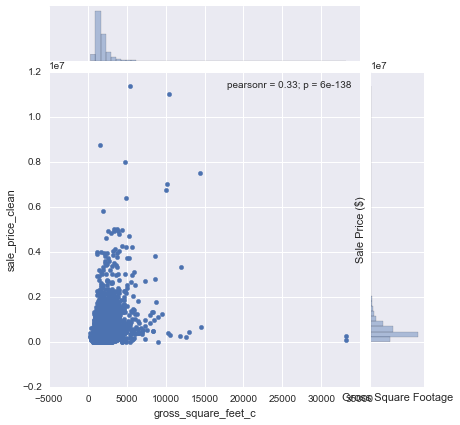

In [38]:
sns.jointplot('gross_square_feet_c', 'sale_price_clean', kind='scatter', data=brooklyn_homes)
plt.xlabel('Gross Square Footage')
plt.ylabel('Sale Price ($)')
plt.show()

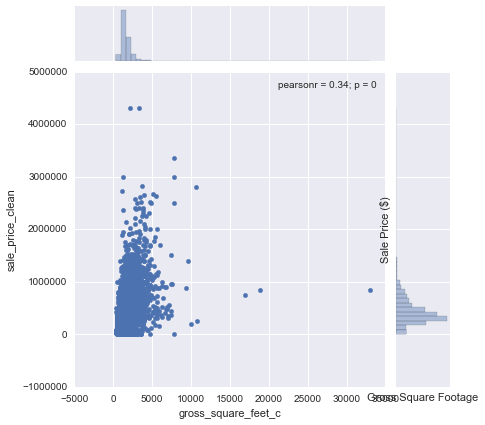

In [39]:
sns.jointplot('gross_square_feet_c', 'sale_price_clean', kind='scatter', data=queens_homes)
plt.xlabel('Gross Square Footage')
plt.ylabel('Sale Price ($)')
plt.show()

In [40]:
brooklyn['building_class_category'].value_counts()

TWO_FAMILY_HOMES                          17200
ONE_FAMILY_HOMES                           9114
THREE_FAMILY_HOMES                         5885
RENTALS_-_WALKUP_APARTMENTS_               4901
COOPS_-_ELEVATOR_APARTMENTS_               4846
CONDOS_-_ELEVATOR_APARTMENTS               3713
TAX_CLASSVACANT_LAND_                      1800
TAX_CLASSCONDOS                            1459
COOPS_-_WALKUP_APARTMENTS_                 1311
CONDOS_-_-_UNIT_RESIDENTIAL                1189
RENTALS_-_-_UNIT_                          1133
CONDO_PARKING_                              908
STORE_BUILDINGS_                            855
COMMERCIAL_GARAGES                          821
COMMERCIAL_VACANT_LAND                      730
CONDOS_-_WALKUP_APARTMENTS                  676
COMMERCIAL_CONDOS_                          434
FACTORIES_                                  403
WAREHOUSES                                  346
TAX_CLASS-_OTHER_                           346
RENTALS_-_ELEVATOR_APARTMENTS_          

Homes in both boroughs show a strong positive linear relationship between the gross square feet and price.  The relationship is much more clear than the one shown in the scatter plots for all sales in Queens an Brooklyn.  

In [41]:
queens_rentals=queens[queens['building_class_category']==('COOPS_-_ELEVATOR_APARTMENTS_' or 'RENTALS_-_-_UNIT_' or 'RENTALS_-_ELEVATOR_APARTMENTS_' or 'RENTALS_-_WALKUP_APARTMENTS_' or 'COOPS_-_WALKUP_APARTMENTS')].dropna()

In [42]:
brooklyn_rentals=brooklyn[brooklyn['building_class_category']==('COOPS_-_ELEVATOR_APARTMENTS_' or 'RENTALS_-_-_UNIT_' or 'RENTALS_-_ELEVATOR_APARTMENTS_' or 'RENTALS_-_WALKUP_APARTMENTS_' or 'COOPS_-_WALKUP_APARTMENTS')].dropna()

In [43]:
queens_rentals=queens_rentals.drop('gross_square_feet_c', axis=1)

In [44]:
brooklyn_rentals=brooklyn_rentals.drop('gross_square_feet_c', axis=1)

In [45]:
t_stat,p=stats.ttest_ind(queens_rentals['sale_price_clean'], brooklyn_rentals['sale_price_clean'], equal_var=False)

In [46]:
print('T-Test for Sales Prices of Rental Builings in Brooklyn and Queens:', t_stat)
print('P Value:', p)

T-Test for Sales Prices of Rental Builings in Brooklyn and Queens: 0.07406388523450906
P Value: 0.9410912999621328


In [47]:
queens_high_val=queens[queens['neighborhood']==('LONG_ISLAND_CITY__' or 'ASTORIA_' or 'NEPONSIT' or 'MASPETH')].dropna()

In [48]:
queens_high_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 22246 to 56489
Data columns (total 27 columns):
Unnamed: 0                        270 non-null int64
address                           270 non-null object
apartment_number                  270 non-null object
block                             270 non-null int64
borough                           270 non-null int64
building_class_at_present         270 non-null object
building_class_at_time_of_sale    270 non-null object
building_class_category           270 non-null object
commercial_units                  270 non-null object
commerical_units                  270 non-null object
ease-ment                         270 non-null object
gross_square_feet                 270 non-null int64
gross_square_feet_c               270 non-null float64
land_square_feet                  270 non-null object
lot                               270 non-null int64
month                             270 non-null int64
neighborhood                  

In [49]:
queens_high_val_03=queens_high_val[queens_high_val['year']==2003]

In [50]:
queens_high_val_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 22246 to 22589
Data columns (total 27 columns):
Unnamed: 0                        144 non-null int64
address                           144 non-null object
apartment_number                  144 non-null object
block                             144 non-null int64
borough                           144 non-null int64
building_class_at_present         144 non-null object
building_class_at_time_of_sale    144 non-null object
building_class_category           144 non-null object
commercial_units                  144 non-null object
commerical_units                  144 non-null object
ease-ment                         144 non-null object
gross_square_feet                 144 non-null int64
gross_square_feet_c               144 non-null float64
land_square_feet                  144 non-null object
lot                               144 non-null int64
month                             144 non-null int64
neighborhood                  

In [51]:
queens_high_val_16=queens_high_val[queens_high_val['year']==2016]

In [52]:
queens_high_val_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 55770 to 56489
Data columns (total 27 columns):
Unnamed: 0                        126 non-null int64
address                           126 non-null object
apartment_number                  126 non-null object
block                             126 non-null int64
borough                           126 non-null int64
building_class_at_present         126 non-null object
building_class_at_time_of_sale    126 non-null object
building_class_category           126 non-null object
commercial_units                  126 non-null object
commerical_units                  126 non-null object
ease-ment                         126 non-null object
gross_square_feet                 126 non-null int64
gross_square_feet_c               126 non-null float64
land_square_feet                  126 non-null object
lot                               126 non-null int64
month                             126 non-null int64
neighborhood                  

In [53]:
t_stat,p=stats.ttest_ind(queens_high_val_03['sale_price_clean'], queens_high_val_16['sale_price_clean'], equal_var=False)

In [54]:
print('T-Test for High Value Neighborhoods in Queens in 2003 and 2016:', t_stat)
print('P-Value:', p)

T-Test for High Value Neighborhoods in Queens in 2003 and 2016: -3.5784054352052386
P-Value: 0.0004882232150265566


In [55]:
print('Average for High Value Neighborhood in 2003:', queens_high_val_03['sale_price_clean'].mean())
print('Average for High Value Neighborhood in 2016:', queens_high_val_16['sale_price_clean'].mean())

Average for High Value Neighborhood in 2003: 1296093.7916666667
Average for High Value Neighborhood in 2016: 11451175.388888888


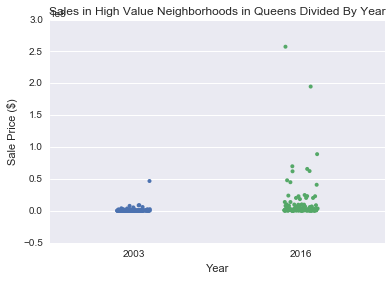

In [56]:
sns.stripplot(x='year', y='sale_price_clean', data=queens_high_val, size=4, jitter=True)
plt.xlabel('Year')
plt.ylabel('Sale Price ($)')
plt.title('Sales in High Value Neighborhoods in Queens Divided By Year')
plt.show()

The means of the high value Queens neighborhoods (Long Island City, Astoria, Nesponsit and Maspeth) are not equal and the result is statistically significant.  However, the difference in the means is not as great as the difference of all sales in Queens from 2003 and 2016 

In [57]:
brooklyn_high_val=brooklyn[brooklyn['neighborhood']==('NAVY_YARD_' and 'WILLIAMSBURG-NORTH' or 'DOWNTOWN-FULTON_FERRY' or 'DOWNTOWN-FULTON_MALL' and 'GREENPOINT')].dropna()

In [58]:
brooklyn_high_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 32831 to 58369
Data columns (total 26 columns):
Unnamed: 0                        82 non-null int64
address                           82 non-null object
apartment_number                  82 non-null object
block                             82 non-null int64
borough                           82 non-null int64
building_class_at_present         82 non-null object
building_class_at_time_of_sale    82 non-null object
building_class_category           82 non-null object
commercial_units                  82 non-null int64
ease-ment                         82 non-null object
gross_square_feet                 82 non-null float64
gross_square_feet_c               82 non-null float64
land_square_feet                  82 non-null object
lot                               82 non-null int64
month                             82 non-null int64
neighborhood                      82 non-null object
residential_units                 82 non-null 

In [59]:
brooklyn_high_val_03=brooklyn_high_val[brooklyn_high_val['year']==2003]

In [60]:
brooklyn_high_val_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 32831 to 32955
Data columns (total 26 columns):
Unnamed: 0                        35 non-null int64
address                           35 non-null object
apartment_number                  35 non-null object
block                             35 non-null int64
borough                           35 non-null int64
building_class_at_present         35 non-null object
building_class_at_time_of_sale    35 non-null object
building_class_category           35 non-null object
commercial_units                  35 non-null int64
ease-ment                         35 non-null object
gross_square_feet                 35 non-null float64
gross_square_feet_c               35 non-null float64
land_square_feet                  35 non-null object
lot                               35 non-null int64
month                             35 non-null int64
neighborhood                      35 non-null object
residential_units                 35 non-null 

In [61]:
brooklyn_high_val_16=brooklyn_high_val[brooklyn_high_val['year']==2003]=brooklyn_high_val[brooklyn_high_val['year']==2016]

In [62]:
brooklyn_high_val_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 58040 to 58369
Data columns (total 26 columns):
Unnamed: 0                        47 non-null int64
address                           47 non-null object
apartment_number                  47 non-null object
block                             47 non-null int64
borough                           47 non-null int64
building_class_at_present         47 non-null object
building_class_at_time_of_sale    47 non-null object
building_class_category           47 non-null object
commercial_units                  47 non-null int64
ease-ment                         47 non-null object
gross_square_feet                 47 non-null float64
gross_square_feet_c               47 non-null float64
land_square_feet                  47 non-null object
lot                               47 non-null int64
month                             47 non-null int64
neighborhood                      47 non-null object
residential_units                 47 non-null 

In [63]:
t_stat,p=stats.ttest_ind(brooklyn_high_val_03['sale_price_clean'], brooklyn_high_val_16['sale_price_clean'], equal_var=False)

In [64]:
print('T-Test for High Value Neighborhoods in Brooklyn in 2003 and 2016:', t_stat)
print('P-Value:', p)

T-Test for High Value Neighborhoods in Brooklyn in 2003 and 2016: -3.7011973616660425
P-Value: 0.0005621905131893616


In [65]:
print('Average Price of High-Value Neighborhood in 2003:', brooklyn_high_val_03['sale_price_clean'].mean())
print('Average Price of High-Value Neighborhood in 2016:', brooklyn_high_val_16['sale_price_clean'].mean())

Average Price of High-Value Neighborhood in 2003: 979649.9714285714
Average Price of High-Value Neighborhood in 2016: 14254287.021276595


While the non-null sample set was not as large as the high value Queens set, the T-stat of the high value set of Brooklyn is very similar.  The Brooklyn high value neighborhoods in 2016 saw a higher average sale price, but again not as high as the overall borough in 2003 versus 2016.

Perhaps the growth in average sale price can be seen in the lower value neighborhoods.

In [66]:
queens_low_val=queens[queens['neighborhood']==('BROAD_CHANNEL__' and 'SO._JAMAICA-BAISLEY_PARK_' or 'BRIARWOOD__' and 'SOUTH_JAMAICA__')].dropna()

In [67]:
queens_low_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 31142 to 62485
Data columns (total 27 columns):
Unnamed: 0                        1203 non-null int64
address                           1203 non-null object
apartment_number                  1203 non-null object
block                             1203 non-null int64
borough                           1203 non-null int64
building_class_at_present         1203 non-null object
building_class_at_time_of_sale    1203 non-null object
building_class_category           1203 non-null object
commercial_units                  1203 non-null object
commerical_units                  1203 non-null object
ease-ment                         1203 non-null object
gross_square_feet                 1203 non-null int64
gross_square_feet_c               1203 non-null float64
land_square_feet                  1203 non-null object
lot                               1203 non-null int64
month                             1203 non-null int64
neighborhood 

In [68]:
queens_low_val_03=queens_low_val[queens_low_val['year']==2003]

In [69]:
queens_low_val_16=queens_low_val[queens_low_val['year']==2016]

In [70]:
t_stat,p=stats.ttest_ind(queens_low_val_03['sale_price_clean'], queens_low_val_16['sale_price_clean'], equal_var=False)

In [71]:
print('T-Test for Low Value Neighborhoods in Queens in 2003 and 2016:', t_stat)
print('P-Value:', p)

T-Test for Low Value Neighborhoods in Queens in 2003 and 2016: -12.067632929252632
P-Value: 4.050674779165717e-31


In [72]:
print('Average Price of Low-Value Neighborhood in 2003:', queens_low_val_03['sale_price_clean'].mean())
print('Average Price of Low-Value Neighborhood in 2016:', queens_low_val_16['sale_price_clean'].mean())

Average Price of Low-Value Neighborhood in 2003: 233675.1494102228
Average Price of Low-Value Neighborhood in 2016: 370911.5136363636


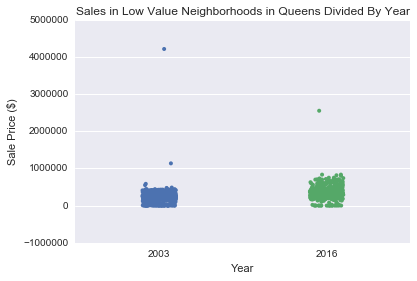

In [73]:
sns.stripplot(x='year', y='sale_price_clean', data=queens_low_val, size=4, jitter=True)
plt.xlabel('Year')
plt.ylabel('Sale Price ($)')
plt.title('Sales in Low Value Neighborhoods in Queens Divided By Year')
plt.show()

Although the two years are relatively close together, the sales in 2016 are clearly higher and the T-stat is much more closer to the T-stat for the whole borough of Queens than the High Value.  

In [74]:
brooklyn_low_val=brooklyn[brooklyn['neighborhood']==('FLATLANDS_' or 'GERRITSEN_BEACH' or 'CANARSIE'or 'CYPRESS_HILL')].dropna()

In [75]:
brooklyn_low_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 20954 to 48428
Data columns (total 26 columns):
Unnamed: 0                        346 non-null int64
address                           346 non-null object
apartment_number                  346 non-null object
block                             346 non-null int64
borough                           346 non-null int64
building_class_at_present         346 non-null object
building_class_at_time_of_sale    346 non-null object
building_class_category           346 non-null object
commercial_units                  346 non-null int64
ease-ment                         346 non-null object
gross_square_feet                 346 non-null float64
gross_square_feet_c               346 non-null float64
land_square_feet                  346 non-null object
lot                               346 non-null int64
month                             346 non-null int64
neighborhood                      346 non-null object
residential_units            

In [76]:
brooklyn_low_val_03=brooklyn_low_val[brooklyn_low_val['year']==2003]

In [77]:
brooklyn_low_val_16=brooklyn_low_val[brooklyn_low_val['year']==2016]

In [78]:
brooklyn_low_val_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 20954 to 21434
Data columns (total 26 columns):
Unnamed: 0                        218 non-null int64
address                           218 non-null object
apartment_number                  218 non-null object
block                             218 non-null int64
borough                           218 non-null int64
building_class_at_present         218 non-null object
building_class_at_time_of_sale    218 non-null object
building_class_category           218 non-null object
commercial_units                  218 non-null int64
ease-ment                         218 non-null object
gross_square_feet                 218 non-null float64
gross_square_feet_c               218 non-null float64
land_square_feet                  218 non-null object
lot                               218 non-null int64
month                             218 non-null int64
neighborhood                      218 non-null object
residential_units            

In [79]:
brooklyn_low_val_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 48196 to 48428
Data columns (total 26 columns):
Unnamed: 0                        128 non-null int64
address                           128 non-null object
apartment_number                  128 non-null object
block                             128 non-null int64
borough                           128 non-null int64
building_class_at_present         128 non-null object
building_class_at_time_of_sale    128 non-null object
building_class_category           128 non-null object
commercial_units                  128 non-null int64
ease-ment                         128 non-null object
gross_square_feet                 128 non-null float64
gross_square_feet_c               128 non-null float64
land_square_feet                  128 non-null object
lot                               128 non-null int64
month                             128 non-null int64
neighborhood                      128 non-null object
residential_units            

In [80]:
t_stat,p=stats.ttest_ind(brooklyn_low_val_03['sale_price_clean'], brooklyn_low_val_16['sale_price_clean'], equal_var=False)

In [81]:
print('T-Test for Low Value Neighborhoods in Brooklyn in 2003 and 2016:', t_stat)
print('P-Value:', p)

T-Test for Low Value Neighborhoods in Brooklyn in 2003 and 2016: -6.952417782434274
P-Value: 7.056341356720321e-11


In [82]:
print('Average Price of Low-Value Neighborhood in 2003:', brooklyn_low_val_03['sale_price_clean'].mean())
print('Average Price of Low-Value Neighborhood in 2016:', brooklyn_low_val_16['sale_price_clean'].mean())

Average Price of Low-Value Neighborhood in 2003: 299856.0366972477
Average Price of Low-Value Neighborhood in 2016: 457878.953125


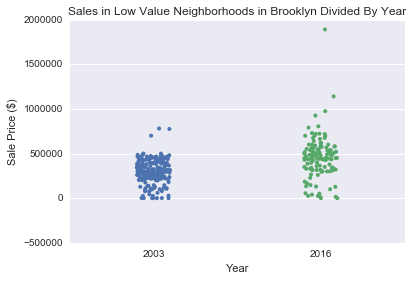

In [83]:
sns.stripplot(x='year', y='sale_price_clean', data=brooklyn_low_val, size=4, jitter=True)
plt.xlabel('Year')
plt.ylabel('Sale Price ($)')
plt.title('Sales in Low Value Neighborhoods in Brooklyn Divided By Year')
plt.show()

The above plot for the low value neighborhood sales in Brooklyn shows that 2016 had much heigher outliers and the median is around the same level ($500,000) as the highest 2003 sales.  

The difference in sale prices in the low value neighborhood also is larger than the higher value neighborhoods.  

The data shows that the majority of the growth in home prices were not experienced in the highest value neighborhoods, but rather in the lower value neighborhoods.  The prices in the lower valued neighborhoods did not reach the levels of the higher neighborhoods but they experience more growth in prices.

In [87]:
queens_homes.to_csv('queens_homes.csv')
brooklyn_homes.to_csv('brooklyn_homes.csv')
queens_high_val.to_csv('queens_high_val.csv')
queens_low_val.to_csv('queens_low_val.csv')
brooklyn_high_val.to_csv('brooklyn_high_val.csv')
brooklyn_low_val.to_csv('brooklyn_low_val.csv')
brooklyn_rentals.to_csv('brooklyn_rentals.csv')
queens_rentals.to_csv('queens_rentals')